In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,8)

In [59]:
quality_name_map = {
    "crowdlab": "CROWDLAB",
    "label_quality_score": "Label Quality Score",
    "agreement": "Agreement",
    "active_label_cleaning": "Active Label Cleaning",
    "empirical_bayes": "Empirical Bayes",
    "no_perannotator_weights": "No Perannotator Weights",
    "dawid_skene": "Dawid-Skene",
    "glad": "GLAD",
    "dawid_skene_with_model": "Dawid-Skene with Model",
    "glad_with_model": "GLAD with Model"
}

consensus_name_map = {
    "majority": "Majority Vote (Agreement)",
    "dawid_skene": "Dawid-Skene",
    "glad": "GLAD",
    "dawid_skene_with_model": "Dawid-Skene with Model",
    "glad_with_model": "GLAD with Model",
    "crowdlab": "CROWDLAB"
}

In [60]:
results = pd.read_csv("benchmark_results/results.csv")
results = results[results["model"] == "truelabels"]

results_qual_score = results[(results["consensus_method"] != "crowdlab") & (results["quality_method"] != "no_perannotator_weights")][
        [
            "dataset",
            "model",
            "quality_method",
            "consensus_quality_auroc",
            "consensus_quality_auprc", 
            "annotator_quality_spearman_corr"
        ]
    ]

results_accuracy = results[
        [
            "dataset",
            "model",
            "consensus_method",
            "consensus_labels_accuracy",
        ]
    ].drop_duplicates(ignore_index=True)

results_qual_score["quality_method"] = results_qual_score["quality_method"].apply(lambda s: quality_name_map[s])
results_accuracy["consensus_method"] = results_accuracy["consensus_method"].apply(lambda s: consensus_name_map[s])

In [61]:
worst_qual_score = results_qual_score[results_qual_score["dataset"] == "worst_annotators"]
uniform_qual_score = results_qual_score[results_qual_score["dataset"] == "uniform_1_5"]
complete_qual_score = results_qual_score[results_qual_score["dataset"] == "complete"]

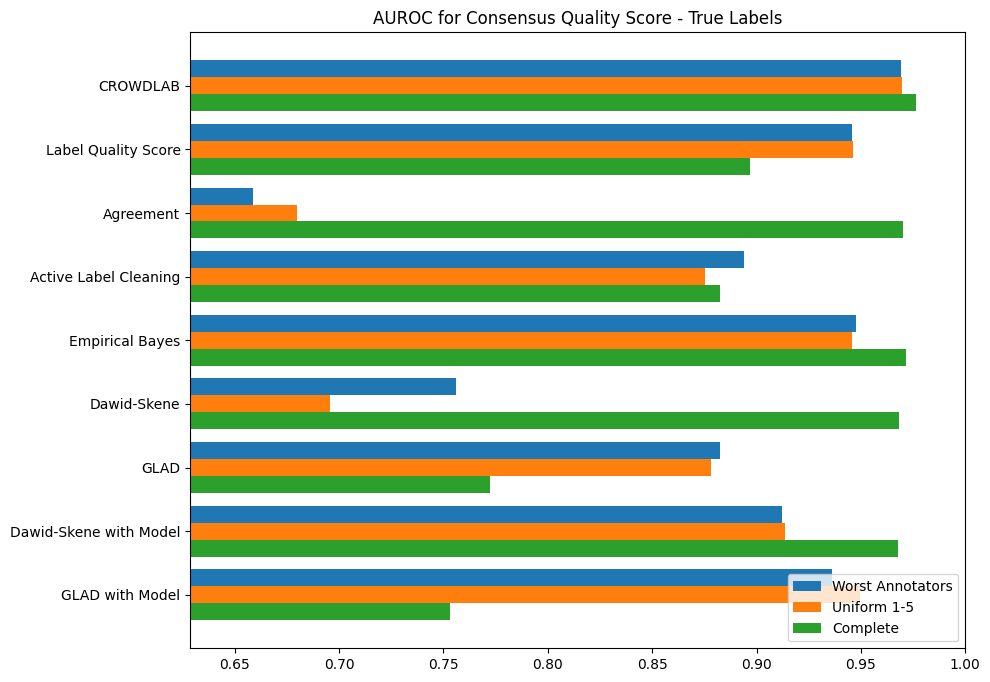

In [62]:
x = np.arange(len(worst_qual_score["quality_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_qual_score["consensus_quality_auroc"], width, label="Worst Annotators") 
plt.barh(x, uniform_qual_score["consensus_quality_auroc"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_qual_score["consensus_quality_auroc"], width, label="Complete") 

plt.xlim(np.min(worst_qual_score["consensus_quality_auroc"]) - 0.03, min(np.max(complete_qual_score["consensus_quality_auroc"]) + 0.03, 1))
plt.yticks(x, worst_qual_score["quality_method"])
plt.title("AUROC for Consensus Quality Score - True Labels")
plt.legend()

plt.show()

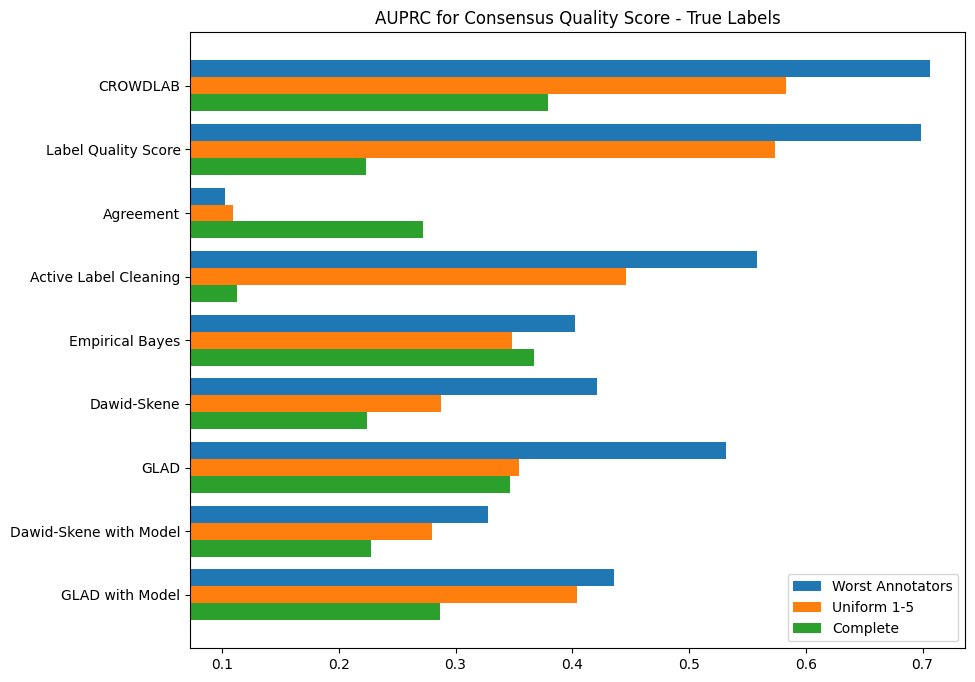

In [63]:
x = np.arange(len(worst_qual_score["quality_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_qual_score["consensus_quality_auprc"], width, label="Worst Annotators") 
plt.barh(x, uniform_qual_score["consensus_quality_auprc"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_qual_score["consensus_quality_auprc"], width, label="Complete") 

plt.xlim(np.min(worst_qual_score["consensus_quality_auprc"]) - 0.03, min(np.max(worst_qual_score["consensus_quality_auprc"]) + 0.03, 1))
plt.yticks(x, worst_qual_score["quality_method"])
plt.title("AUPRC for Consensus Quality Score - True Labels")
plt.legend()

plt.show()

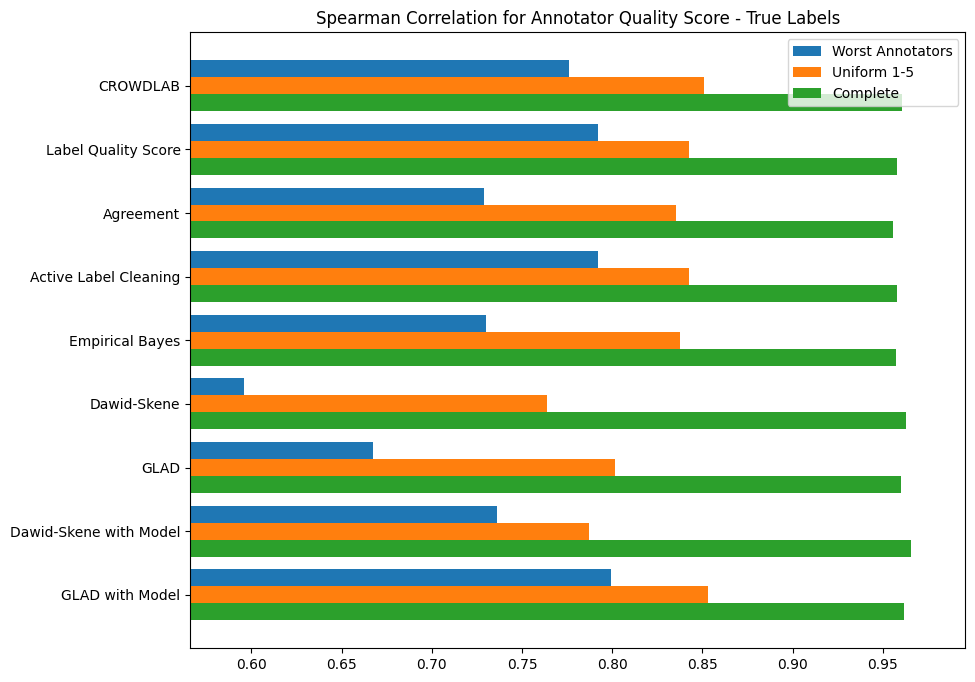

In [64]:
x = np.arange(len(worst_qual_score["quality_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_qual_score["annotator_quality_spearman_corr"], width, label="Worst Annotators") 
plt.barh(x, uniform_qual_score["annotator_quality_spearman_corr"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_qual_score["annotator_quality_spearman_corr"], width, label="Complete") 

plt.xlim(np.min(worst_qual_score["annotator_quality_spearman_corr"]) - 0.03, min(np.max(complete_qual_score["annotator_quality_spearman_corr"]) + 0.03, 1))
plt.yticks(x, worst_qual_score["quality_method"])
plt.title("Spearman Correlation for Annotator Quality Score - True Labels")
plt.legend()

plt.show()

In [65]:
worst_accuracy = results_accuracy[results_accuracy["dataset"] == "worst_annotators"].reset_index(drop=True).reindex([5, 0, 1, 2, 3, 4])
uniform_accuracy = results_accuracy[results_accuracy["dataset"] == "uniform_1_5"].reset_index(drop=True).reindex([5, 0, 1, 2, 3, 4])
complete_accuracy = results_accuracy[results_accuracy["dataset"] == "complete"].reset_index(drop=True).reindex([5, 0, 1, 2, 3, 4])

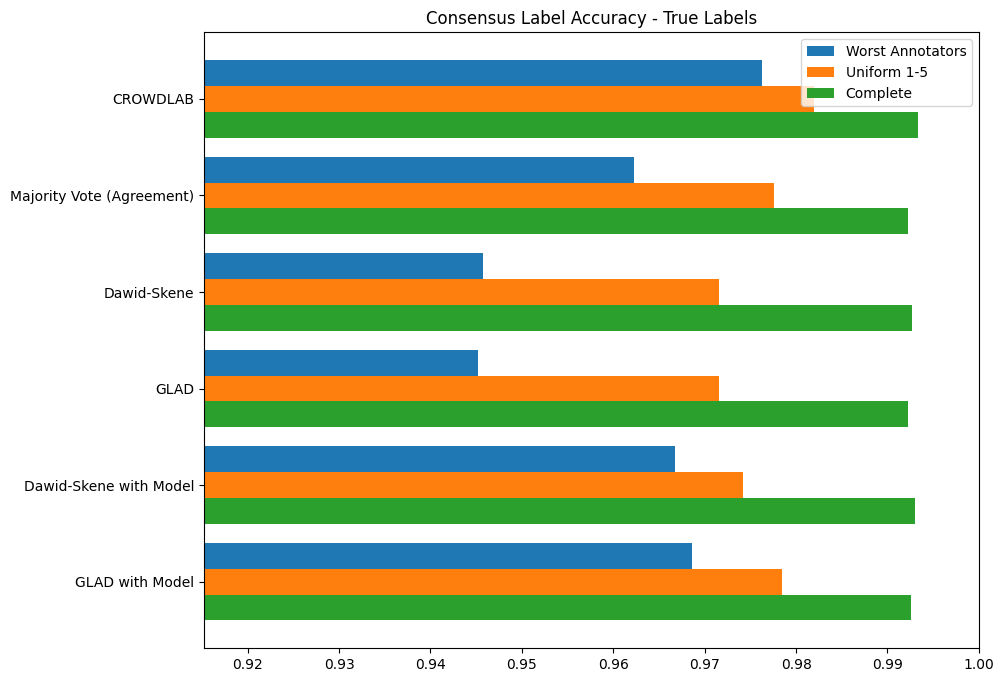

In [66]:
x = np.arange(len(worst_accuracy["consensus_method"]) * 1.5 - 1.5, -1.5, -1.5)
width = 0.4 # the width of the bars

plt.barh(x + width, worst_accuracy["consensus_labels_accuracy"], width, label="Worst Annotators") 
plt.barh(x, uniform_accuracy["consensus_labels_accuracy"], width, label="Uniform 1-5") 
plt.barh(x - width, complete_accuracy["consensus_labels_accuracy"], width, label="Complete") 

plt.xlim(np.min(worst_accuracy["consensus_labels_accuracy"]) - 0.03, min(np.max(complete_accuracy["consensus_labels_accuracy"]) + 0.03, 1))
plt.yticks(x, worst_accuracy["consensus_method"])
plt.title("Consensus Label Accuracy - True Labels")
plt.legend()

plt.show()